In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

TRAIN_FRACTION = 0.8
NUM_EPOCHS = 150
STEP_SIZE = 0.1

# TODO: Add paragraphs of explanation at the top! Also give credit to sthalles and AI + Social Good there

In [5]:
housing_data = pd.read_csv("./real_estate.csv", sep=",")
housing_data.head()

# Possibly have them identify what might be interesting to build a model on (answer is housing price vs. size).
# You could frame this as: "We want to predict housing prices given relevant features. Which one immediately stands out?
# Part of good AI is understanding data."

,MLS,Location,Price,Bedrooms,Bathrooms,Size,Price/SQ.Ft,Status
0,132842,Arroyo Grande,795000.0,3,3,2371,335.30,Short Sale
1,134364,Paso Robles,399000.0,4,3,2818,141.59,Short Sale
2,135141,Paso Robles,545000.0,4,3,3032,179.75,Short Sale
3,135712,Morro Bay,909000.0,4,4,3540,256.78,Short Sale
4,136282,Santa Maria-Orcutt,109900.0,3,1,1249,87.99,Short Sale


Text(0.5, 1.0, 'Housing Price vs. Size')

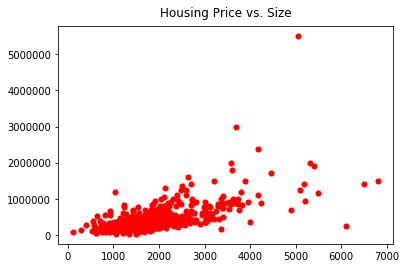

In [40]:
X_ind = housing_data[["Size"]]
Y_dep = housing_data[["Price"]]

plt.plot(X_ind, Y_dep, "ro", markeredgewidth=0.1)
plt.title("Housing Price vs. Size", pad=10)
# TODO: Add axes and title to graph!
# TODO: Consider having them segment by Location, Bedrooms, Bathrooms, etc. 

In [41]:
"""
size_mean = np.mean(independent_var)
size_std = np.std(independent_var)

price_mean = np.mean(dependent_var)
price_std = np.std(dependent_var)

norm_ind = (independent_var - size_mean) / size_std # explain that you can divide entire arrays/matrices with numpy
norm_dep = (dependent_var - price_mean) / price_std # consider renaming variables away from independent/dependent

plt.plot(norm_ind, norm_dep, "ro", markeredgewidth=0.1)
"""
# Leaving out normalization for now. Discuss this with TechEd

# Explain when normalizing the data may be a good idea
# TODO: Ask TechEd if it makes sense here / how to explain when to use or not use
# Explain the different types of normalization?

# UPDATE: Results come out with weird scale (lowest X is negative)
# QUESTION: If you normalize, then how do you get back the actual, un-normalized price prediction when making a new prediction?

'\nsize_mean = np.mean(independent_var)\nsize_std = np.std(independent_var)\n\nprice_mean = np.mean(dependent_var)\nprice_std = np.std(dependent_var)\n\nnorm_ind = (independent_var - size_mean) / size_std # explain that you can divide entire arrays/matrices with numpy\nnorm_dep = (dependent_var - price_mean) / price_std # consider renaming variables away from independent/dependent\n\nplt.plot(norm_ind, norm_dep, "ro", markeredgewidth=0.1)\n'

In [42]:
# Going from (781,1) to (781,) 
X_ind = X_ind.squeeze()
Y_dep = Y_dep.squeeze()

In [43]:
# Normalizing input features
min_size = np.min(X_ind)
max_size = np.max(X_ind)
min_price = np.min(Y_dep)
max_price = np.max(Y_dep)

X_ind = (X_ind - min_size) / (max_size - min_size)
Y_dep = (Y_dep - min_price) / (max_price - min_price)

In [44]:
# Shuffling the data
#X_ind = np.random.permutation(X_ind)
# Y_dep = np.random.permutation(Y_dep)
p = np.random.permutation(len(X_ind))
X_ind = X_ind[p]
Y_dep = Y_dep[p]

In [50]:
# Splitting training/test sets
# NOTE: this is something that should be done by attendees using list indexing
num_datapoints = X_ind.shape[0] # could just as easily be Y_dep.shape[0]
train_cutoff = int(TRAIN_FRACTION * num_datapoints) # index that divides training from test data

X_train = X_ind[0:train_cutoff] # could take this time to explain how list indexing works (last is exclusive, first is inclusive, etc.) 
X_test = X_ind[train_cutoff:]
Y_train = Y_dep[0:train_cutoff]
Y_test = Y_dep[train_cutoff:]

# TODO: Find some way to test that students are right: add asserts?

Text(0.5, 1.0, 'Normalized Housing Price vs. Size')

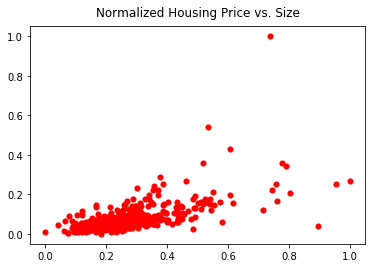

In [51]:
plt.plot(X_train, Y_train, "ro", markeredgewidth=0.1)
plt.title("Normalized Housing Price vs. Size", pad=10)

In [52]:
# only for one dimension
"""def squared_loss(weights, X_feature, Y_label):
    return (weights*X_feature - Y_label)**2"""

'def squared_loss(weights, X_feature, Y_label):\n    return (weights*X_feature - Y_label)**2'

In [53]:
# Have them compute mean squared error?
# TODO: Need to implement algorithm!
# NOTE: My own attempt. Biggest question is that there is only one feature? How to stop getting -inf then?
"""
weights = 0 # only one feature, right? # rows in X_ind are the number of examples while columns are the number of features, and we only have one feature

num_epochs = 150
for epoch in range(1, NUM_EPOCHS):
    weights -= STEP_SIZE * squared_loss(weights, X_ind[epoch], Y_dep[epoch]) # Q: Is the whole idea of SGD that you only do one example per epoch?
    # TODO: make this a function like in example Q: What to pass in?
print("weights: ", weights)
# Q: What am I doing wrong with my algorithm? Do I need more features?""" 

'\nweights = 0 # only one feature, right? # rows in X_ind are the number of examples while columns are the number of features, and we only have one feature\n\nnum_epochs = 150\nfor epoch in range(1, NUM_EPOCHS):\n    weights -= STEP_SIZE * squared_loss(weights, X_ind[epoch], Y_dep[epoch]) # Q: Is the whole idea of SGD that you only do one example per epoch?\n    # TODO: make this a function like in example Q: What to pass in?\nprint("weights: ", weights)\n# Q: What am I doing wrong with my algorithm? Do I need more features?'

In [54]:
min_x = np.min(X_train)
max_x = np.max(X_train)

In [55]:
# Define the Linear model
# Initialize the weights using a normal (Gaussian) distribution with 0 mean and unit variance
W0 = np.random.normal(loc=0, scale=0.02) # Y intercept
W1 = np.asarray(np.random.normal(loc=0, scale=0.02)) # Slop of the line
W1 = W1.reshape((1))

In [83]:
def next_batch(Xs, Ys, batch_size=64):
    p = np.random.permutation(len(Xs))
    Xs = Xs[p]
    Ys = Ys[p]
    for i in range(0,Xs.shape[0],batch_size):
        x_batch = Xs[i:i+batch_size]
        if x_batch.shape[0] < batch_size:
            continue
        # print("x_batch shape: ", x_batch.shape)
        # print("Ys shape: ", Ys[i:i+batch_size].shape)
        yield np.reshape(x_batch, (batch_size,-1)), Ys[i:i+batch_size]
        # yield np.reshape(x_batch, Ys[i:i+batch_size])
        # yield x_batch, Ys[i:i+batch_size]

In [84]:
def eval_and_plot(W0, W1, min_x, max_x, id_):
    min_y = W0 + np.dot(W1, min_x)
    max_y = W0 + np.dot(W1, max_x)
    plt.plot(Xs_train, Ys_train, 'ro')
    plt.plot([min_x, max_x], [min_y, max_y], 'k-', lw=2)
    #plt.savefig("./media/fit%(number)04d.png" % {"number": id_})
    #plt.clf()
    plt.show()

In [85]:
# defines the size of the step we want to perform in the direction of the gradient
lr = 0.1

# set the pocket weights
W0_hat = np.inf
W1_hat = np.inf
best_hypothesis = np.inf

validation_err_list = []
training_err_list = []
batch_size = 96
total_epochs = 150

In [86]:
def mean_squared_error(Ys_batch, Y_pred):
    return np.mean((Ys_batch-Y_pred)**2)

In [87]:
for epoch in range(NUM_EPOCHS):
    erros = []
    for X_batch, y_batch in next_batch(X_train, Y_train, batch_size=batch_size): 
        # (JR) NOTE: the yielding gets you batches as you go along. See https://www.geeksforgeeks.org/use-yield-keyword-instead-return-keyword-python/

        # linearly combine input and weights
        train_pred = W0 + np.dot(X_batch, W1)
    
        # calculate the SSE between predicted and true values
        train_err = mean_squared_error(y_batch, train_pred)
        erros.append(train_err)
        
        # calculate the gradients with respect to W0 and W1
        DW0 = -(2/batch_size) * sum(y_batch.squeeze() - train_pred.squeeze())
        DW1 = -(2/batch_size) * sum(X_batch.squeeze() * (y_batch.squeeze() - train_pred.squeeze()))

        # update W0 and W1 in the opposite direction to the gradient
        W0 = W0 - lr * DW0
        W1 = W1 - lr * DW1
    
    eval_and_plot(W0, W1, min_x, max_x, epoch+1)
    training_err_list.append(np.mean(erros))
    
    # test in the end of epoch
    val_pred = W0 + np.dot(np.reshape(X_test, (-1,1)), W1)
    val_err = mean_squared_error(Y_test, val_pred)
    print("Epoch:", epoch, "Generalization err:", val_err)
    validation_err_list.append(val_err)
    
    #epoch += 1
    if val_err < best_hypothesis:
        best_hypothesis = val_err
        W0_hat = W0
        W1_hat = W1

/home/jromano/.local/lib/python3.6/site-packages/pandas/core/series.py:842: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


Exception: Data must be 1-dimensional